In [25]:
import numpy as np
import sympy
from sympy import Symbol
from sympy import Rational
import matplotlib.pyplot as plt
import csv
import scipy

# 构造勒让德多项式，并存储在P中

In [26]:
x = Symbol('x')
Lgd = [sympy.numer(1), x]

for i in range(2,11):
    Lgd.append(sympy.simplify(Rational(2 * i - 1, i) * x * Lgd[i - 1] - Rational(i - 1, i) * Lgd[i - 2]))
for i in range(11):
    print(i, Lgd[i])

0 1
1 x
2 3*x**2/2 - 1/2
3 x*(5*x**2 - 3)/2
4 35*x**4/8 - 15*x**2/4 + 3/8
5 x*(63*x**4 - 70*x**2 + 15)/8
6 231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16
7 x*(429*x**6 - 693*x**4 + 315*x**2 - 35)/16
8 6435*x**8/128 - 3003*x**6/32 + 3465*x**4/64 - 315*x**2/32 + 35/128
9 x*(12155*x**8 - 25740*x**6 + 18018*x**4 - 4620*x**2 + 315)/128
10 46189*x**10/256 - 109395*x**8/256 + 45045*x**6/128 - 15015*x**4/128 + 3465*x**2/256 - 63/256


# 构造目标函数

In [27]:
f = sympy.exp(x)

# 计算勒让德多项式的模长

In [28]:
norm = []
for i in range(11):
    norm.append(sympy.integrate(Lgd[i] ** 2, (x, -1, 1)))
print(norm)

[2, 2/3, 2/5, 2/7, 2/9, 2/11, 2/13, 2/15, 2/17, 2/19, 2/21]


# 计算f在以勒让德多项式为基的空间中的分量

In [29]:
coef = []
for i in range(11):
    coef.append(sympy.integrate(f * Lgd[i], (x, -1, 1))/ norm[i])
print(coef)

[-exp(-1)/2 + E/2, 3*exp(-1), -35*exp(-1)/2 + 5*E/2, -35*E/2 + 259*exp(-1)/2, -1197*exp(-1) + 162*E, -3619*E/2 + 26741*exp(-1)/2, -351091*exp(-1)/2 + 47515*E/2, -358830*E + 2651415*exp(-1), -90607229*exp(-1)/2 + 12262355*E/2, -233893781*E/2 + 1728254269*exp(-1)/2, -18202633113*exp(-1) + 2463458508*E]


# 由上面计算得出的系数构造最佳平方逼近多项式，以及其误差

In [30]:
P = []
epsilon = []
for i in range(11):
    tmp_p = 0
    for j in range(i + 1):
        tmp_p += coef[j] * Lgd[j]
    P.append(sympy.simplify(tmp_p))
    epsilon.append(sympy.simplify(f - P[i]))
for i in range(11):
    print(i, P[i], epsilon[i])

0 sinh(1) exp(x) - sinh(1)
1 (6*x - 1 + exp(2))*exp(-1)/2 (-6*x + 2*exp(x + 1) - exp(2) + 1)*exp(-1)/2
2 (12*x + 5*(-7 + exp(2))*(3*x**2 - 1) - 2 + 2*exp(2))*exp(-1)/4 (-12*x + 5*(7 - exp(2))*(3*x**2 - 1) + 4*exp(x + 1) - 2*exp(2) + 2)*exp(-1)/4
3 (-7*x*(-37 + 5*exp(2))*(5*x**2 - 3) + 12*x + 5*(-7 + exp(2))*(3*x**2 - 1) - 2 + 2*exp(2))*exp(-1)/4 (-7*x*(37 - 5*exp(2))*(5*x**2 - 3) - 12*x + 5*(7 - exp(2))*(3*x**2 - 1) + 4*exp(x + 1) - 2*exp(2) + 2)*exp(-1)/4
4 5*(-8379*x**4 + 1134*x**4*exp(2) - 70*x**3*exp(2) + 518*x**3 - 966*x**2*exp(2) + 7140*x**2 - 306*x + 42*x*exp(2) - 705 + 96*exp(2))*exp(-1)/8 (-5670*x**4*exp(2) + 41895*x**4 - 2590*x**3 + 350*x**3*exp(2) - 35700*x**2 + 4830*x**2*exp(2) - 210*x*exp(2) + 1530*x + 8*exp(x + 1) - 480*exp(2) + 3525)*exp(-1)/8
5 3*(-75999*x**5*exp(2) + 561561*x**5 - 27930*x**4 + 3780*x**4*exp(2) - 622230*x**3 + 84210*x**3*exp(2) - 3220*x**2*exp(2) + 23800*x**2 - 17955*x*exp(2) + 132685*x - 2350 + 320*exp(2))*exp(-1)/16 (-1684683*x**5 + 227997*x**5*exp(2)

# 画出图像

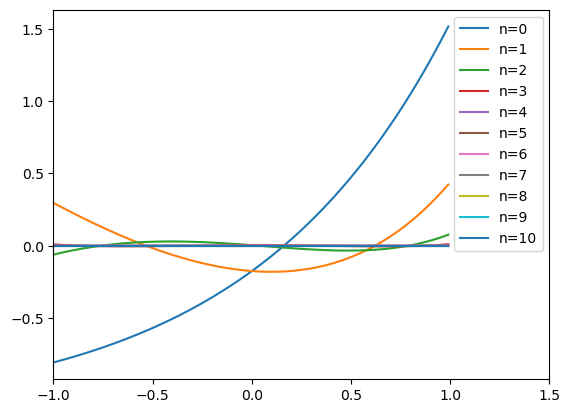

In [31]:
x_range = np.arange(-1, 1, 0.01)
error = []
for i in range(11):
    tmp_error = []
    for x_ in x_range:
        tmp_error.append(epsilon[i].evalf(subs = {x:x_}))
    error.append(tmp_error)
    tmp_error = np.array(tmp_error)
    plt.plot(x_range, tmp_error, label = "n=" + str(i))
plt.xlim(-1, 1.5)
plt.legend(loc='best')
plt.savefig("误差.svg", dpi=300,format='svg')
plt.show()

# 上面的计算得到的都是解析解，现在求数值解

In [32]:
P_float = []
epsilon_float = []
for i in range(11):
    P_float.append(sympy.simplify(P[i].evalf()))
    epsilon_float.append(sympy.simplify(epsilon[i].evalf()))
for i in range(11):
    print(i, P_float[i], epsilon_float[i])

0 1.17520119364380 exp(x) - 1.1752011936438
1 1.10363832351433*x + 1.1752011936438 -1.10363832351433*x + 0.367879441171442*exp(x + 1) - 1.1752011936438
2 0.536721525971059*x**2 + 1.10363832351433*x + 0.996294018320115 -0.536721525971059*x**2 - 1.10363832351433*x + 0.367879441171442*exp(x + 1) - 0.996294018320115
3 0.176139084171224*x**3 + 0.536721525971059*x**2 + 0.997954873011593*x + 0.996294018320115 -0.176139084171224*x**3 - 0.536721525971059*x**2 - 0.997954873011593*x + 0.367879441171442*exp(x + 1) - 0.996294018320115
4 0.0435974356513095*x**4 + 0.176139084171224*x**3 + 0.499352295412685*x**2 + 0.997954873011593*x + 1.00003094137593 -0.0435974356513931*x**4 - 0.176139084171219*x**3 - 0.499352295412685*x**2 - 0.997954873011598*x + 0.367879441171442*exp(x + 1) - 1.00003094137594
5 0.00865924075198658*x**5 + 0.0435974356513931*x**4 + 0.166517705557217*x**3 + 0.499352295412769*x**2 + 1.00001659699943*x + 1.00003094137595 -0.0086592407493099*x**5 - 0.0435974356513931*x**4 - 0.1665177055

# 将数值解以latex公式形式给出

In [33]:
latex_formula = []
for i in range(11):
    latex_formula.append([sympy.latex(P_float[i]), sympy.latex(epsilon_float[i]), sympy.latex(P[i]), sympy.latex(epsilon[i])])
with open('latex_formula.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(latex_formula)

# 计算极值

In [34]:
abs_error = np.abs(error)
max_error = np.max(abs_error, axis=1)
print(max_error)

[1.51603327870547 0.423431338426280 0.0762977461457297 0.0100167849111821
 0.00102592199263293 9.23120414227268e-5 7.14229769069819e-6
 4.78243618165514e-7 2.82283563996151e-8 1.48978475696039e-9
 7.11018883495221e-11]


# 画出误差图像

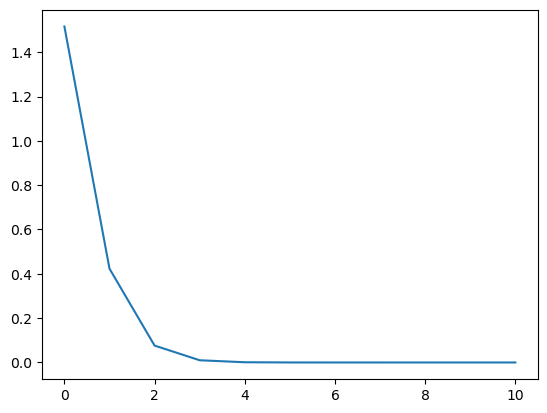

In [35]:
n = np.arange(0, 11)
plt.plot(n, max_error)
plt.show()